### Read the .csv file

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
df = pd.read_csv('Student Performance.csv')

### KNN Model 2

<img src="Model 2.jpg" width=500 height=500 />

### Obtain the feature matrix and label

In [2]:
# convert these data into 2D numpy array
# order: math percentage, reading score percentage, writing score percentage
X = np.array([[df['math percentage'][0], 
              df['reading score percentage'][0], 
              df['writing score percentage'][0]]], 
             dtype = 'float')
for i in range(1,1000):
    X = np.append(X, [[df['math percentage'][i], 
                  df['reading score percentage'][i], 
                  df['writing score percentage'][i]]],axis=0)
print('feature matrix')
print(X)
print('size: ' + str(X.shape))
print()

# lavel 0: master's degree
if(df['parental level of education'][0] == "master's degree"):
    first_elem = 0
# lavel 1: bachelor's degree
elif(df['parental level of education'][0] == "bachelor's degree"):
    first_elem = 1
# lavel 2: associate's degree
elif(df['parental level of education'][0] == "associate's degree"):
    first_elem = 2
# lavel 3: some college
elif(df['parental level of education'][0] == 'some college'):
    first_elem = 3
# lavel 4: high school
elif(df['parental level of education'][0] == 'high school'):
    first_elem = 4
# lavel 5: some high school
else:
    first_elem = 5
    
y = np.array([first_elem], dtype = 'int')
for i in range(1,1000):
    if(df['parental level of education'][i] == "master's degree"):
        y = np.append(y, 0)
    elif(df['parental level of education'][i] == "bachelor's degree"):
        y = np.append(y, 1)
    elif(df['parental level of education'][i] == "associate's degree"):
        y = np.append(y, 2)
    elif(df['parental level of education'][i] == 'some college'):
        y = np.append(y, 3)
    elif(df['parental level of education'][i] == 'high school'):
        y = np.append(y, 4)
    else:
        y = np.append(y, 5)
print('Labels')
print(y)
print('size: ' + str(y.shape))


feature matrix
[[0.72 0.72 0.74]
 [0.69 0.9  0.88]
 [0.9  0.95 0.93]
 ...
 [0.59 0.71 0.65]
 [0.68 0.78 0.77]
 [0.77 0.86 0.86]]
size: (1000, 3)

Labels
[1 3 0 2 3 2 3 3 4 4 2 2 4 3 0 5 4 5 0 2 4 3 3 5 1 0 3 1 4 0 3 3 0 3 3 2 2
 5 2 2 2 2 2 3 2 2 2 4 2 4 3 2 3 4 5 4 2 2 3 5 1 5 2 2 5 5 5 3 2 2 3 3 2 5
 5 2 5 1 5 0 2 4 3 2 4 3 3 2 3 5 1 4 4 2 3 2 5 3 3 1 3 1 2 4 3 3 0 2 2 5 2
 4 2 3 1 4 1 1 5 3 1 2 3 4 3 4 5 3 0 1 0 5 3 3 1 1 5 4 2 3 5 3 3 4 3 3 5 2
 1 2 5 1 2 1 5 3 4 3 2 2 2 3 0 4 0 1 4 0 4 3 4 5 3 2 1 0 4 2 0 5 0 3 4 2 5
 2 4 5 5 1 2 3 5 3 0 2 5 4 3 1 2 3 2 2 3 5 1 4 3 3 5 3 4 2 4 5 2 4 4 5 4 2
 5 5 2 0 3 4 5 3 3 2 1 5 1 2 1 5 3 2 4 1 4 3 5 2 2 4 4 4 5 3 5 0 4 3 2 2 3
 0 5 3 5 4 4 5 1 4 2 3 1 3 2 3 3 1 5 4 5 1 4 4 1 3 5 2 2 5 1 5 2 5 5 1 4 2
 5 2 4 2 3 5 2 2 2 3 3 5 2 4 2 1 1 2 1 4 0 2 1 2 4 4 3 5 4 3 3 3 2 5 4 2 2
 2 1 3 5 2 5 5 4 4 4 2 3 4 3 1 4 2 1 3 3 2 3 1 2 3 3 3 4 5 3 5 3 1 4 1 5 5
 3 3 5 3 1 2 5 0 5 1 2 2 0 5 5 3 1 2 4 0 5 3 3 2 5 4 4 2 5 5 5 3 3 4 4 5 2
 2 4 2 0 3 2 5 1 4 1 2

In [3]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split
# where X is all the sample data, y is all the labels
# random_state=1 means only random once and rest stay the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) # We can fix the random_state for reproducibility!

In [4]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

(700, 3)
(700,)


In [5]:
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(300, 3)
(300,)


In [6]:
print(X_test)
print('\n')
print(y_test)

[[0.55 0.41 0.48]
 [0.44 0.54 0.53]
 [0.7  0.64 0.7 ]
 [0.6  0.59 0.54]
 [0.7  0.56 0.51]
 [0.92 0.79 0.84]
 [0.64 0.79 0.77]
 [0.86 0.81 0.75]
 [0.99 0.93 0.9 ]
 [0.78 0.77 0.77]
 [0.73 0.76 0.78]
 [0.33 0.41 0.43]
 [0.69 0.58 0.53]
 [0.65 0.78 0.82]
 [0.45 0.59 0.64]
 [0.59 0.65 0.66]
 [0.97 0.92 0.86]
 [0.57 0.69 0.68]
 [0.81 0.8  0.76]
 [0.63 0.6  0.57]
 [0.54 0.59 0.5 ]
 [0.62 0.67 0.69]
 [0.64 0.66 0.59]
 [0.81 0.72 0.77]
 [0.73 0.76 0.78]
 [0.36 0.29 0.27]
 [0.58 0.61 0.52]
 [0.5  0.48 0.53]
 [0.81 0.88 0.9 ]
 [0.62 0.68 0.68]
 [0.68 0.54 0.53]
 [0.53 0.71 0.67]
 [0.18 0.32 0.28]
 [0.69 0.58 0.57]
 [0.4  0.52 0.43]
 [0.63 0.55 0.63]
 [0.66 0.63 0.64]
 [0.65 0.7  0.71]
 [0.66 0.65 0.6 ]
 [0.61 0.47 0.56]
 [0.43 0.62 0.61]
 [0.5  0.48 0.42]
 [0.82 0.85 0.87]
 [0.6  0.7  0.74]
 [0.87 0.73 0.72]
 [0.82 0.85 0.86]
 [0.88 0.99 0.95]
 [0.64 0.73 0.68]
 [0.69 0.65 0.74]
 [0.66 0.72 0.7 ]
 [0.37 0.45 0.38]
 [0.52 0.57 0.56]
 [0.87 0.84 0.76]
 [0.52 0.7  0.62]
 [0.79 0.73 0.67]
 [0.78 0.8

In [7]:
from sklearn.metrics import accuracy_score
highest = 0
best_k = 0
for i in range(1,300):
    k = i
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    if(highest == 0):
        highest = accuracy
    elif(highest < accuracy):
        highest = accuracy
        best_k = i
    else:
        pass
print("The highest accuracy: " + str(highest))
print("When k= " + str(best_k))

The highest accuracy: 0.29333333333333333
When k= 57


#### Using Cross Validation on KNN algorithm to see if the model accuary can be improved

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

highest = 0
best_k = 0
for i in range(1,300):
    k = i
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    accuracy = scores.mean()
    if(highest == 0):
        highest = accuracy
    elif(highest < accuracy):
        highest = accuracy
        best_k = i
    else:
        pass
print("The highest accuracy: " + str(highest))
print("When k= " + str(best_k))

k=1, accuracy=0.20600000000000002
k=2, accuracy=0.194
k=3, accuracy=0.185
k=4, accuracy=0.188
k=5, accuracy=0.189
k=6, accuracy=0.20400000000000001
k=7, accuracy=0.21100000000000002
k=8, accuracy=0.202
k=9, accuracy=0.198
k=10, accuracy=0.202
k=11, accuracy=0.202
k=12, accuracy=0.21100000000000002
k=13, accuracy=0.199
k=14, accuracy=0.21400000000000002
k=15, accuracy=0.22300000000000003
k=16, accuracy=0.22400000000000003
k=17, accuracy=0.22999999999999998
k=18, accuracy=0.22800000000000004
k=19, accuracy=0.229
k=20, accuracy=0.23899999999999996
k=21, accuracy=0.22999999999999998
k=22, accuracy=0.23200000000000004
k=23, accuracy=0.23500000000000001
k=24, accuracy=0.246
k=25, accuracy=0.246
k=26, accuracy=0.24299999999999997
k=27, accuracy=0.24900000000000003
k=28, accuracy=0.246
k=29, accuracy=0.242
k=30, accuracy=0.238
k=31, accuracy=0.24
k=32, accuracy=0.24100000000000002
k=33, accuracy=0.24000000000000005
k=34, accuracy=0.24099999999999996
k=35, accuracy=0.24100000000000002
k=36, acc

k=277, accuracy=0.22599999999999998
k=278, accuracy=0.233
k=279, accuracy=0.225
k=280, accuracy=0.23000000000000004
k=281, accuracy=0.229
k=282, accuracy=0.22999999999999998
k=283, accuracy=0.23000000000000004
k=284, accuracy=0.22800000000000004
k=285, accuracy=0.22899999999999995
k=286, accuracy=0.231
k=287, accuracy=0.231
k=288, accuracy=0.22799999999999998
k=289, accuracy=0.22500000000000003
k=290, accuracy=0.227
k=291, accuracy=0.229
k=292, accuracy=0.231
k=293, accuracy=0.227
k=294, accuracy=0.22799999999999998
k=295, accuracy=0.22900000000000004
k=296, accuracy=0.231
k=297, accuracy=0.22999999999999998
k=298, accuracy=0.227
k=299, accuracy=0.22600000000000003
The highest accuracy: 0.262
When k= 164


In [9]:
k = 57
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=57)

In [10]:
# Predicting the Binary Label:
y_predict = knn.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = knn.predict_proba(X_test)

In [11]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob[:,1])

[4 3 1 5 4 2 5 4 4 2 2 4 4 5 1 3 2 2 4 5 0 5 2 2 3 4 4 3 1 0 5 2 5 1 2 3 2
 3 3 3 1 4 3 5 2 2 0 2 3 4 1 4 5 0 3 1 3 3 3 1 3 2 5 2 4 5 3 2 3 3 2 2 5 1
 5 3 3 5 5 5 3 3 3 3 4 5 2 3 5 5 4 3 3 5 4 4 2 4 5 2 2 4 4 0 4 4 2 5 4 3 2
 4 4 3 4 2 4 3 4 1 2 0 5 2 3 5 4 5 5 1 5 2 0 2 4 5 1 3 4 4 1 4 4 5 4 4 3 5
 5 4 2 2 0 3 2 3 5 0 2 5 2 5 5 3 0 5 3 0 2 1 3 3 4 1 4 2 0 3 2 2 2 4 3 1 4
 0 4 5 1 1 3 5 1 5 4 3 4 5 2 1 1 3 5 5 3 1 5 4 4 5 2 4 5 5 2 2 2 5 3 5 4 2
 3 2 4 5 2 2 4 2 3 3 5 2 2 3 3 2 5 4 3 3 3 2 4 4 3 3 5 5 4 3 2 2 2 3 5 0 3
 5 2 4 5 5 5 5 5 4 3 4 1 0 3 3 5 5 4 3 3 5 2 1 1 5 4 0 4 2 2 5 4 5 2 4 4 1
 1 4 3 3]
[4 2 2 3 4 2 3 2 2 2 3 5 3 3 2 3 2 3 2 3 2 2 3 2 3 4 3 4 1 2 2 4 5 3 4 3 3
 3 3 4 2 4 3 3 2 2 2 4 4 3 5 2 2 4 2 2 3 3 4 3 3 3 3 4 4 3 4 2 2 2 2 2 4 3
 3 3 2 5 2 2 4 3 3 3 4 3 2 2 3 2 3 2 3 4 5 3 2 3 3 4 2 2 2 2 2 2 2 3 3 2 3
 3 3 3 4 2 4 3 3 2 3 2 5 2 2 3 1 4 2 2 3 4 2 3 3 2 3 3 3 3 3 2 3 3 5 4 3 4
 3 4 2 2 5 5 2 5 4 3 2 3 2 2 1 2 3 3 3 3 4 3 3 4 2 1 3 4 2 3 2 3 2 2 2 3 5
 2 3 2 2 2 5 2 

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [12]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.003663   0.01465201 0.02197802 0.05860806 0.0952381
 0.15384615 0.21245421 0.3003663  0.3956044  0.4981685  0.63736264
 0.83150183 0.94871795 0.99267399 0.996337   1.        ]
[0.         0.         0.         0.07407407 0.11111111 0.22222222
 0.25925926 0.33333333 0.37037037 0.40740741 0.48148148 0.62962963
 0.88888889 0.96296296 0.96296296 0.96296296 1.        ]


# AUC:

In [13]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5375118708452042


# ROC Curve:

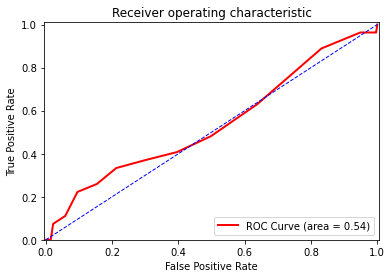

In [14]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Conclusion
### KNN model accuracy: 0.26 when k=164 with Cross Validation
### KNN model accuracy: 0.29 when k=57 without Cross Validation